# Entrega 1 - Visão Computacional

## Gabriela Moreno Boriero e Ellen Beatriz Shen 

### ENG-3A

In [1]:
%matplotlib inline
import cv2
from math import *
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.2 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

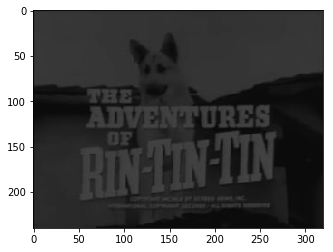

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

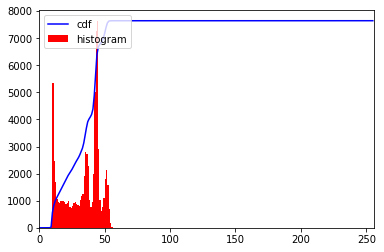

In [7]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [8]:
rintin_gray.flatten().max()

58

In [9]:
rintin_gray.flatten().min()

8

In [10]:
#preta e branca, RGB de um canal só. Vai de um valor minimo ate 50 e pouco

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

*1.* O histograma não aproveita bem as faixas de cores, pois ocupa uma faixa entre 0 e 50 enquanto poderia ocupar uma faixa entre 0 e 255. 

In [11]:
saida = rintin_gray.copy()

In [12]:
saida.shape

(240, 320)

In [13]:
saida = np.zeros((240, 320), dtype=np.uint8)

for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = rintin_gray[i][j]

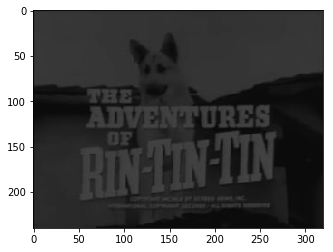

In [14]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

In [15]:
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = 5.1*((rintin_gray[i][j])) - 32.8 

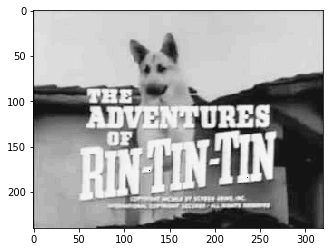

In [16]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

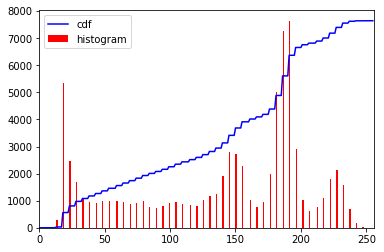

In [17]:
hist,bins = np.histogram(saida.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(saida.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Utilizamos os pontos máximo e mínimo para encontrar a equação que melhor utiliza as cores entre esses dois pontos.

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


In [18]:
foto = cv2.imread("cena_canto_sala.jpg")

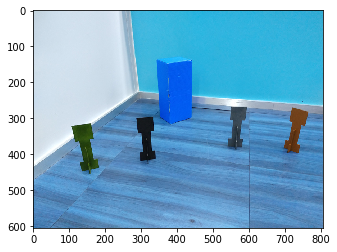

In [19]:
plt.imshow(foto,interpolation="none")

In [20]:
foto_rgb = cv2.cvtColor(foto, cv2.COLOR_BGR2RGB)

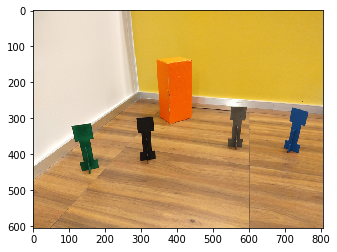

In [21]:
plt.imshow(foto_rgb,interpolation="none")

### Cor Vermelha

In [22]:
foto_r = foto_rgb[:,:,0]

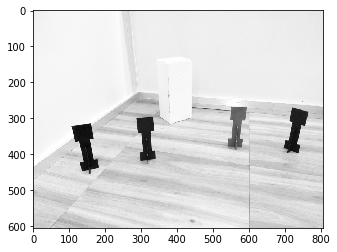

In [23]:
plt.imshow(foto_r, cmap='Greys_r')

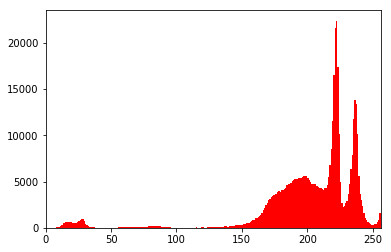

In [24]:
hist,bins = np.histogram(foto_r.flatten(),256,[0,256])
plt.hist(foto_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

Pelo histograma e a imagem do canal R, percebemos que a caixa vermelha aparece branca, logo concluímos que ela está representada pelo pico mais próximo de 255.

### Cor Azul

In [25]:
foto_b = foto_rgb[:,:,2]

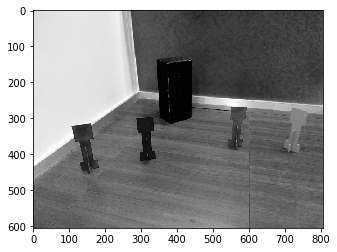

In [26]:
plt.imshow(foto_b, cmap='Greys_r')

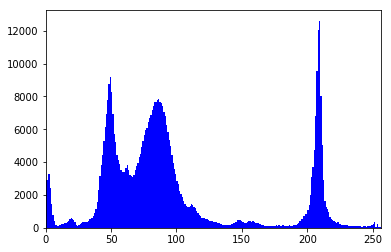

In [27]:
hist,bins = np.histogram(foto_b.flatten(),256,[0,256])
plt.hist(foto_b.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.show()

Na imagem, o creeper azul é o que está mais escuro, logo no histograma ele estaá representado pelo pico mais próximo da cor 0.

In [28]:
foto_g = foto_rgb[:,:,1]

In [29]:
saida = np.zeros(foto_r.shape, dtype=np.uint8)

for i in range(foto_r.shape[0]):
    for j in range(foto_r.shape[1]):
        if foto_r[i][j]> 150 and foto_b[i][j] < 26 and foto_g[i][j] < 200:
            saida[i][j] = 255

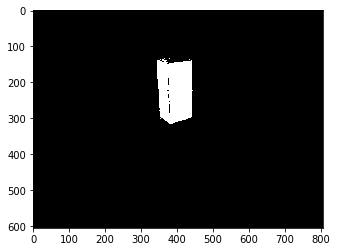

In [30]:
plt.imshow(saida, cmap="Greys_r" )

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [31]:
imagem = cv2.imread("hall_box_battery_atividade3.png")

In [32]:
imagem.shape

(576, 1024, 3)

In [33]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

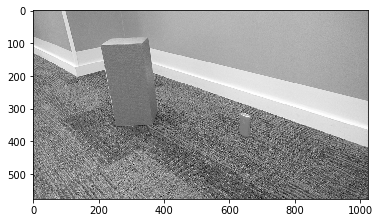

In [34]:
plt.imshow(imagem_gray, cmap="Greys_r", vmin=0, vmax=255)

In [35]:
imagem_gray.shape[0]

576

In [36]:
imagem_final = imagem.copy()

In [37]:
for i in range(1, imagem_gray.shape[0]-1):
    for j in range(1, imagem_gray.shape[1]-1):
        imagem_final[i][j]= fabs(int(imagem_gray[i+1][j])-int(imagem_gray[i-1][j]))#][fabs(int(imagem_gray[j+1])-int(imagem_gray[j-1]))]
    

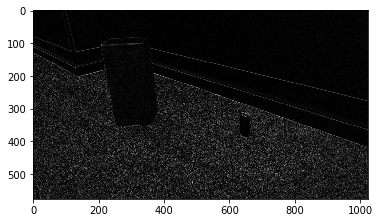

In [38]:
plt.imshow(imagem_final)